In [22]:
from numpy.random import choice
from pandas import read_csv, DataFrame
from sklearn.cluster import KMeans
import os, sys
# sys.path.insert(0, 'C:/Users/jjung/Documents/GitHub//bkmark_organizer/test_parser_stemmer/prototype/TxtClus/')
sys.path.insert(0, '/home/jz/proj/News-Spam-Detect/TxtClus')
from nlp.termWeighting import doc_term_matrix
from EstimateK.seqFit import sensitiv

In [13]:
class Clusterings(object):
    '''Define a class that encapsulates textual processing tools.'''
    def __init__(self, param_dict):
        self.__param_dict = param_dict        
    
    def get_file(self):
        '''read csv input into a pandas data frame'''
        return read_csv(self.__param_dict['file_loc'], encoding = 'latin1')

    def term_weight_matr(self, snippetsArr):
        '''compute a document-term matrix based on a collection of text documents'''
        return doc_term_matrix(snippetsArr, self.__param_dict)
    
    def resample(self, df, NUM_BOOTSTRAPS = 3):
        bootstraps = [None] * NUM_BOOTSTRAPS
        for bootI in range(NUM_BOOTSTRAPS):  
            bootstraps[bootI] = df.sample(frac=1/NUM_BOOTSTRAPS, replace=True)
        return bootstraps

In [14]:
if __name__ == "__main__":
    # Pass in settings to instantiate a Clusterings object called vecSpaceMod1:
    vecSpaceMod = Clusterings({'file_loc': sys.path[0] + '/Input/newsSample.csv',
                               'tf_dampen': True,
                               'common_word_pct': 1,
                               'rare_word_pct': 1,
                               'dim_redu': False})
    df = vecSpaceMod.get_file() # Load csv file into data frame.

In [15]:
    # Take 3 bootstrap sub-samples for faster, bagged kmeans fits:
    bstraps = vecSpaceMod.resample(df)
    # Compute the Term Frequency Inverse Document Frequency matrix based on news headlines:    
    X = [vecSpaceMod.term_weight_matr(bstrap.TITLE) for bstrap in bstraps]
        
            
#     X1 = vecSpaceMod1.term_weight_matr(samp1.TITLE).toarray()

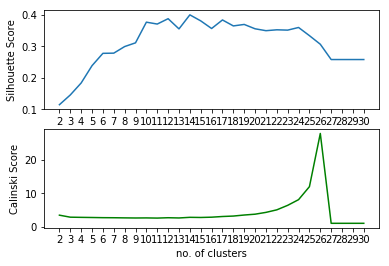

In [24]:
    sensitiv(X[0].toarray())    

In [ ]:
    df = DataFrame({'predictedCluster': KMeans(17).fit(X1).labels_, 
                    'document': term_weight_obj['samp']}).sort_values(by='predictedCluster')
    
    print(df)